# Drainage stability 02

When simulating, the head may cross the elevation of the tile drains or ground surface. When this happens de drainage resistance changes from `infinity` to `c_drain` when the head rises or from `c_drain` to `infinity` when the head is descending.
To deal with this in a managed fashion, when this happens during a time step, the moment at which this occurs is computed and the head is simulated up to the point at which it touches the drain elevation.

At that point, an extraction is added such that the head remains at the drainage level for the rest of the time step. This flow is a constant has has been proven mathematically, can be computed in advance and is added to the drainage flux or surface runoff.

@TO 2020-09-19

The governing partial differential equation only takes the situaiton below up to the drainage level but not including it. So the drainage resistance does not play in the differential equation

$$kD\frac{d^{2}h}{dx^{2}}	=-N+\frac{h-\phi}{c}$$


The transient solution for the cross section used in the GGOR is then

$$\overline{h}-\phi=\left(\overline{h}_{0}-\phi\right)e^{-\frac{t-t_{0}}{T}}+\left\{ Nc-\Lambda\left[Nc-\left(h_{LR}-\phi\right)\right]\right\} \left(1-e^{-\frac{t-t_{0}}{T}}\right)$$
of
$$\overline{h}-\phi=\left(\overline{h}_{0}-\phi\right)e^{-\frac{t-t_{0}}{T}}+ B \left(1-e^{-\frac{t-t_{0}}{T}}\right)$$
with for convenience
$$B = Nc-\Lambda\left[Nc-\left(h_{LR}-\phi\right)\right]$$
and
$$T=\mu c$$
and
$$\Lambda = \frac{1}{\frac{b}{\lambda}\mbox{ctanh}\frac{b}{\lambda}+\frac{b/c}{D/w}}$$
The rate of the head change is
$$\frac{d\overline{h}}{dt}	=\frac{1}{T}\left\{ \phi-\overline{h}_{0}+B\right\} e^{-\frac{t-t_{0}}{T}}$$

The moment that the water reaches the drainage level can be computed from the solution, setting $\overline h = z_{dr}$.
$$z_{dr}-\phi=\left(\overline{h}_{0}-\phi\right)e^{-\frac{t-t_{0}}{T}}+ B \left(1-e^{-\frac{t-t_{0}}{T}}\right)$$
ofwel
$$z_{dr}-\phi-B=\left(\overline{h}_{0}-\phi-B\right)e^{-\frac{t-t_{0}}{T}}$$
dus
$$\Delta t=t-t_{0}=T\ln\left(\frac{\overline{h}_{0}-\phi-B}{z_{dr}-\phi-B}\right)$$

When passing the drainage level, the water flow is
$$q_{dr}=\mu\left(\frac{d\overline{h}}{dt}\right)_{\tau,\,\overline{h}=z_{dr}}$$
$$q_{dr}=\mu\frac{d\overline{h}}{dt}	=\frac{\mu}{T}\left\{ \phi-\overline{h}_{0}+B\right\} e^{-\frac{t-t_{0}}{T}},\,t>t_{0}+\Delta t$$
en met $T=\mu c$
$$q_{dr}=\frac{1}{c}\left\{ \phi-\overline{h}_{0}+B\right\} e^{-\frac{t-t_{0}}{T}},\,t>t_{0}+\Delta t$$
The flow across the drainage level must be substracted from the recharge to make sure the water table stays at the drainage during the rest of the time step. The drainage flux here is not ok, because it assumes that the heads continue to develop as before. This is not the case. So we must compute this flux directly from the requirement that the water remains at the drainage level voor the rest of the time step (or time, as the equations have not limitation into the future, as long as the parametrs and boundary conditions remain unchanged

Here is the derivation of this surface runoff or drainage flux to keep the head at the drainage level. It starts with the equation for the water table development over time from the moment that the water table touches the drainage level. At that point and onwards in time we have time $\tau$ and $\overline h = z_{dr}$ and $\overline h+0 = z_{dr}$ as well:
$$z_{dr}-\phi	=\left(z_{dr}-\phi\right)e^{-\frac{\tau}{T}}+\left\{ \left(N-q_{dr}\right)c-\left[\left(N-q_{dr}\right)c-\left(h_{LR}-\phi\right)\right]\Lambda\right\} \left(1-e^{-\frac{\tau}{T}}\right)$$
This equation can then be simplified in a few steps
$$\left(z_{dr}-\phi\right)\left(1-e^{-\frac{\tau}{T}}\right)	=\left\{ \left(N-q_{dr}\right)c-\left[\left(N-q_{dr}\right)c-\left(h_{LR}-\phi\right)\right]\Lambda\right\} \left(1-e^{-\frac{\tau}{T}}\right)$$
this yields
$$\left(z_{dr}-\phi\right)	=\left(N-q_{dr}\right)c-\left[\left(N-q_{dr}\right)c-\left(h_{LR}-\phi\right)\right]\Lambda$$
and further we get
$$\left(z_{dr}-\phi\right)	=\left(N-q_{dr}\right)c\left(1-\Lambda\right)+\left(h_{LR}-\phi\right)\Lambda$$
and finally
$$q_{dr}	=N+\left(\frac{\phi-z_{dr}}{c}\right)\frac{1}{1-\Lambda}-\left(\frac{\phi-h_{LR}}{c}\right)\frac{\Lambda}{1-\Lambda}$$
We see that $q_dr$ is a constant and that a simple relation that shows that it consists of the left over of the recharge $N$, the upward flux caused by the regional head $\phi$ relative to the drainage level and that of the outflow to the ditches caused by a head equal to the drainge level. This all makes hydrologically sense.

In the special case that ditch level $h_{LR}$ equal drainage level $z_{dr}$ this flux simpllifies even further:
$$q_{dr}=N+\left(\frac{\phi-z_{dr}}{c}\right),\,\,\,\,\,h_{LR}=z_{dr}$$

We can now develop the routine.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [180]:
def newfig(title='title?', xlabel='xlabel?', ylabel='ylabel?', xscale='linear', yscale='linear',
           xlim=None, ylim=None, size_inches=(12, 11), **kwargs):
    """Return ax for new plot."""
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.grid()
    return ax

def newfig2(titles=['title1', 'title2'], xlabel='time',
            ylabels=['heads [m]', 'flows [m2/d]'],
            xscale='linear',
            yscales=['linear', 'linear'],
            sharex=True,
            sharey=False,
            xlims=None,
            ylims=None,
            size_inches=(12, 6),
            **kwargs):
    """Return ax[0], ax[1] for new plot."""
    fig, ax = plt.subplots(2, 1, sharex=sharex, sharey=sharey)
    fig.set_size_inches(size_inches)
    for a, title, ylabel, yscale in zip(ax, titles, ylabels, yscales):
        a.set_title(title)
        a.set_xlabel(xlabel)
        a.set_ylabel(ylabel)
        a.set_xscale(xscale)
        a.set_yscale(yscale)
        a.grid()
    if xlims is not None:
        ax[0].set_xlim(xlims[0])
        ax[1].set_xlim(xlims[1])
    if ylims is not None:
        ax[0].set_ylim(ylims[0])
        ax[1].set_ylim(ylims[1])
    return ax

In [75]:
# parameters
N = 0.05
h0, phi, hlr, hdr,  = 0., 0.5, 0.5, 1.0
b, mu, k, D, c, w = 75., 0.15, 10., 10., 150, 0.5
tend = 40

kw = {'N': N, 'h0': h0, 'phi': phi, 'hlr': hlr, 'hdr': hdr,
'b':b, 'mu': mu, 'k': k, 'D': D, 'c': c, 'lam': np.sqrt(k * D * c),
      'T': mu * c, 'rising': np.nan,'w': w, 'tend': tend}

kw

{'N': 0.05,
 'h0': 0.0,
 'phi': 0.5,
 'hlr': 0.5,
 'hdr': 1.0,
 'b': 75.0,
 'mu': 0.15,
 'k': 10.0,
 'D': 10.0,
 'c': 150,
 'lam': 122.47448713915891,
 'T': 22.5,
 'rising': nan,
 'w': 0.5,
 'tend': 40}

In [178]:
def time_values(tau=None, N=None, T=None, phi=None, h0=None,
          hlr=None, c=None, Lam=None, lam=None, **kw): 
    Lam = (1 /((b / lam) *np.cosh(b / lam)
            / np.sinh(b / lam) + (b / c)/ (D / w)))
    e = np.exp(- tau / T)
    B = N * c - (N * c - (hLR - phi)) * Lam

    htau = phi + (h0 - phi) * e + B * (1 -e)
    
    dhdt = (phi - h0) * e + B * e
    
    qdr = N + (phi - hdr) / c / (1 - Lam) - (phi - hlr) / c * Lam / (1 - Lam)

    rising = (phi - h0 + B) > 0
    r = (h0 - phi - B) / (hdr - phi - B)
    if r > 1:
        tauhit =  T * np.log(r)
        e = np.exp(- tauhit  / T)
        hhit  = phi + (h0 - phi) * e + B * (1 - e) 
    else:
        tauhit = np.nan
        hhit = np.nan
    print('Phi: ', phi)  
    # inplace update
    return {'Lam':Lam, 'B':B, 'htau':htau, 'dhdt':dhdt, 'qdr':qdr, 
               'r':r, 'rising':rising, 'tauhit':tauhit, 'hhit':hhit}


def plot_all(color=None, ax=None, t=None, htau=None, hlr=None, h0=None, phi=None, phih=None,
             tauhit=None, hhit=None, rising=None,
             k=None, D=None, c=None, dhdt=None,
             N=None, qdr=None,  **kw):
    
    title=('tauhit={:.4g}, rising ={}, kD={}, c={}'.format(
        tauhit, rising, k, D, c) + 
        ', phi={}, N={:.4f} qdr={:.4f}'.format(phi, N, qdr))
    
    ax.set_title(title)
    
    ax.hlines(hdr, t[0], t[-1], label='hdr', lw=0.5, color='green')
    ax.hlines(hlr, t[0], t[-1], label='hlr', lw=0.5, color='blue')
    ax.plot(t, htau, '.-', label='head', lw=2, color=color)
    if tauhit and hhit:
        ax.plot(t[0] + tauhit, hhit, 'ro', label='hit')    

        #ax2 = ax.twinx()
    #ax2.set_ylabel('dhdt')
    #ax2.plot(t, dhdt, label='dhdt')
    #pdb.set_trace()    

    print('r ={:.4g} rising ={}, tauhit={:.3f} hhit={:.3f} h0={:.3f}, N={:.3f} qdr={:.3f} '
          .format(kw['r'], rising, tauhit, hhit, h0, N, qdr))

Phi:  0.3
r =2.109 rising =True, tauhit=16.791 hhit=0.300 h0=0.000, N=0.005 qdr=0.003 
Phi:  0.3
r =-2.657 rising =True, tauhit=nan hhit=nan h0=0.000, N=-0.013 qdr=-0.016 
N = -0.013339212631829158, qdr=-0.01560705515819499
Phi:  0.3
r =nan rising =False, tauhit=nan hhit=nan h0=nan, N=0.021 qdr=0.018 


/Users/Theo/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


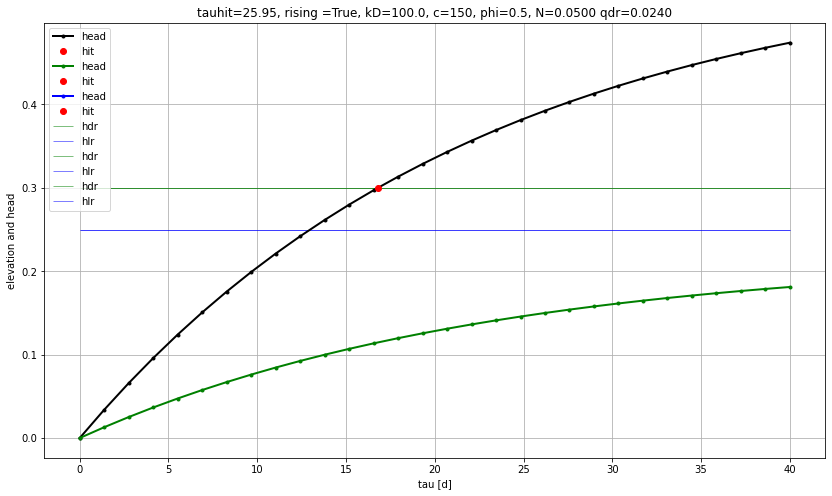

In [179]:
# parameters
N = 0.005
h0, phi, hlr, hdr,  = 0., 0.3, 0.25, 0.3
b, mu, k, D, c, w = 75., 0.15, 10., 10., 150, 0.5
tend = 40

kw = {'N': N, 'h0': h0, 'phi': phi, 'hlr': hlr, 'hdr': hdr,
'b':b, 'mu': mu, 'k': k, 'D': D, 'c': c, 'lam': np.sqrt(k * D * c),
      'T': mu * c, 'rising': np.nan,'w': w, 'tend': tend}

ax = newfig(title, 'time [d]', 'head [m]', size_inches=(14, 8))
kw['ax'] = ax
kw['N'] = N
tauend1 = 40
tau1  = np.linspace(0, tauend1, 30)
kw.update(time_values(tau=tau1, **kw))
plot_all(t=0 + tau1, color='black', **kw)

qdr = kw['N'] + (kw['phi'] - kw['h0' ]) / kw['c'] / (1 - kw['Lam']) -\
                (kw['phi'] - kw['hlr']) / kw['c'] * kw['Lam'] / (1 - kw['Lam'])
kw['N'] = N - qdr
kw.update(time_values(tau=tau1, **kw))
plot_all(t=0 + tau1, color='green', **kw)
print('N = {}, qdr={}'.format(kw['N'], kw['qdr']))

# Second time step from thit
tauend2 = 20
tau2 = np.linspace(0, tauend2, 30)
kw['h0']=kw['hhit']
kw['N'] = N - kw['qdr']
thit = kw['tauhit']
kw.update(time_values(tau=tau2, **kw))
plot_all(t=thit + tau2, color='blue', **kw)

ax.set_title(title)
ax.set_xlabel('tau [d]')
ax.set_ylabel('elevation and head')
ax.legend()
plt.show()
     

## Test

N=0.05, qdr=-0.3606163581846462
N=0.05, qdr=0.0
N=0.05, qdr=-0.14825381700765022


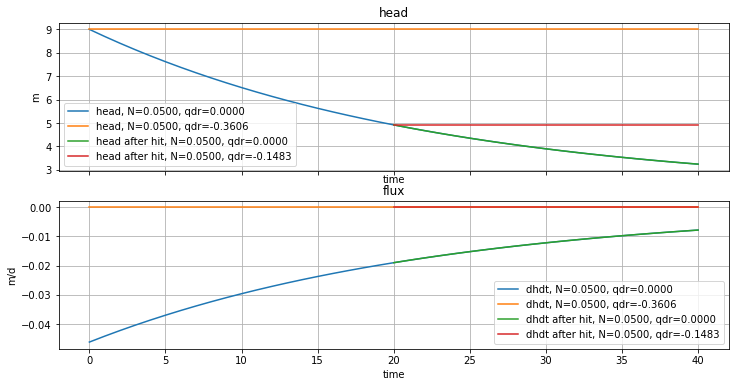

The resulting head after subtracting qdr from N is exactly horizontal!
As it should.


In [328]:
b, mu, k, D, c, w = 75., 0.15, 10., 10., 150, 0.5
T = mu * c
lam = np.sqrt(k * D * c)
Lam = (1 /((b / lam) *np.cosh(b / lam) / np.sinh(b / lam) + (b / c)/ (D / w)))
N   = 0.05
h0  = 9
phi = +10
hlr = -0.2
hdr = 0.5

tend = 40

time = np.linspace(0, 40, 41)
ht   = np.zeros_like(time)
dhdt = np.zeros_like(time)

ax = newfig2(['head', 'flux'], 'time', ['m', 'm/d'], sharey=False)

qdr = 0.
B = (N  -qdr) * c - ((N - qdr)* c - (hlr - phi)) * Lam
for it, tau in enumerate(time):
    e = np.exp(-tau / T)
    ht[it] = phi + (h0 - phi) * e + B * (1- e)
    dhdt[it] = mu * ((phi - h0) + B )* e / T

# Remember for later start point at tdr, zdr
tdr = time[time <= 20][-1] 
zdr = ht[  time <= 20][-1]
    
# Next same with N-qdr as recharge (should keep water table constant)   
ax[0].plot(time, ht,   label='head, N={:.4f}, qdr={:.4f}'.format(N, qdr))
ax[1].plot(time, dhdt, label='dhdt, N={:.4f}, qdr={:.4f}'.format(N, qdr))

qdr = N + (phi - h0) / c / (1 - Lam) - (phi - hlr) / c * Lam / (1 - Lam)
print('N={}, qdr={}'.format(N, qdr))
B = (N  -qdr) * c - ((N - qdr)* c - (hlr - phi)) * Lam
for it, tau in enumerate(time):
    e = np.exp(-tau / T)
    ht[it] = phi + (h0 - phi) * e + B * (1- e)
    dhdt[it] = mu * ((phi - h0) + B )* e / T

ax[0].plot(time, ht,   label='head, N={:.4f}, qdr={:.4f}'.format(N, qdr))
ax[1].plot(time, dhdt, label='dhdt, N={:.4f}, qdr={:.4f}'.format(N, qdr))

# ===============================================================
# Continue from point tdr, zdr with and without keeping the head constant

# For arbitrary time steps
Tau = np.linspace(0, 20, 81)
htt   = np.zeros(len(Tau))
dhdtt = np.zeros(len(Tau))
# First with qdr = 0
qdr = 0.
print('N={}, qdr={}'.format(N, qdr))
B = (N  -qdr) * c - ((N - qdr)* c - (hlr - phi)) * Lam
for it, tau in enumerate(Tau):
    e = np.exp(-tau / T)
    htt[  it] = phi + (zdr - phi) * e + B * (1- e)
    dhdtt[it] = mu * ((phi - zdr) + B )* e / T

ax[0].plot(tdr + Tau, htt,   label='head after hit, N={:.4f}, qdr={:.4f}'.format(N, qdr))
ax[1].plot(tdr + Tau, dhdtt, label='dhdt after hit, N={:.4f}, qdr={:.4f}'.format(N, qdr))

# Second with qdr pertaining to the drain level zdr
qdr = N + (phi - zdr) / c / (1 - Lam) - (phi - hlr) / c * Lam / (1 - Lam)
print('N={}, qdr={}'.format(N, qdr))
B = (N  -qdr) * c - ((N - qdr)* c - (hlr - phi)) * Lam
for it, tau in enumerate(Tau):
    e = np.exp(-tau / T)
    htt[  it] = phi + (zdr - phi) * e + B * (1- e)
    dhdtt[it] = mu * ((phi - zdr) + B )* e / T

ax[0].plot(tdr + Tau, htt,   label='head after hit, N={:.4f}, qdr={:.4f}'.format(N, qdr))
ax[1].plot(tdr + Tau, dhdtt, label='dhdt after hit, N={:.4f}, qdr={:.4f}'.format(N, qdr))

ax[0].legend()
ax[1].legend()
plt.show()
print("The resulting head after subtracting qdr from N is exactly horizontal!")
print("As it should.")


## Test the procedure in a loop over time

In [352]:
# kw = b=b, wo=wo, wi=wi, c=c, cdrain=cdrain, mu=mu, k=k, D=D,

def get_B(N=None, qdr=None, phi=None, hlr=None, c=None):
    """Compute the B variable."""
    B      = (N - qdr) * c - ((N - qdr) * c - (hlr - phi)) * Lam
    return B

def move_on(t=None, dtau=None, ht=None, T=None, phi=None, B=None):
    e = np.exp(-dtau / T)     # At and of current time step.
    f = (1 - e) / (dtau / T)  # Exact aveage over current time step.
    hend    = phi + (ht - phi) * e + B * (1 - e)
    dhdt    = (phi - ht + B) * e / T
    h0mean  = phi + (ht - phi) * f + B * (1 - f)
    return t + dtau, hend, dhdt, h0mean


def start_trace():
    time = np.linspace(0, 60, 121)
    Dt = np.diff(time); Dt = np.hstack((Dt[0], Dt))
    rech = 0.01
    q_up = 0.0
    phi  = 0.5
    hlr  = 0.3
    hdr  = 0.4
    k, D, c, cdrain = 10., 10., 150, 10
    wo, wi = 1., 2.
    lam = k * D * c
    T = mu * c
    htol = 0.001

    kwvars = {'b':b, 'wo':wo, 'wi':wi, 'c':c, 'cdrain':cdrain, 'mu':mu,
                     'k':k, 'D':D}
    if hlr > hdr:
        cdr = cdrain
    else:
        cdr = np.Inf
    h0 = np.zeros(len(time) + 1); h0[0] = hlr
    h1 = np.zeros(len(time) + 1)
    dhdt = np.zeros_like(time)
    qdrn = np.zeros_like(time)
    RECH = np.ones_like(time) * rech; RECH[time < 10] = 0.; RECH[time > 30] = 0.

    #pdb.set_trace()

    solution_name = 'L1f'

    htoks  = ['t', 'N', 'qdr', 'r', 'dtau', 'ht', 'hdr', 'hlr', 'phi', 'rising']
    header = ('    ' + ''.join(['{:8s}' for k in range(len(htoks))])).format(*htoks)
    print(header)

    fmt = ''.join(['{:8.4f}' for k in range(len(htoks))])
    for it, (dt, t1, N) in enumerate(zip(Dt, np.cumsum(Dt), RECH)):
        ht = h0[it]
        w_ = wi if ht > hlr else wo
        Lam  = 1 / ((b / lam) / np.tanh(b / lam) + (w_ / D) * (c / b))

        if solution_name == 'L1q': phi = ht + c * q_up

        B = get_B(N=N, qdr=0., phi=phi, hlr=hlr, c=c)

        rising = (phi - ht + B) > 0

        t = t1 - dt
        dtau = dt
        while t < t1:
            hit = ht > hdr - htol and ht < hdr + htol
            
            if hit and rising:
                qdr = N + (phi - hdr) / c / (1 - Lam) - (phi - hlr) / c * Lam / (1 - Lam)
                B = get_B(N=N, qdr=qdr, phi=phi, hlr=hlr, c=c)
                dtau = t1 - t
            else:
                qdr = 0.
                B = get_B(N=N, qdr=qdr, phi=phi, hlr=hlr, c=c)
            
                r = (phi - ht + B) / (phi - hdr + B)
                future_hit  = r > 1
                if future_hit and rising: # we hit hdr in the future
                    thit = t + T * np.log(r)
                    gonna_hit = thit <= t1
                    if gonna_hit:
                        dtau = thit - t
                    else:
                        dtau = t1 - t

            t, ht, dhdti, h0mean = move_on(
                        t=t, dtau=dtau, ht=ht, T=T, phi=phi, B=B)

            lcls = locals()
            print(fmt.format(*[lcls[k] for k in htoks]))

        h0[it + 1] = ht
        h1[it + 1] = phi
        dhdt[it]   = dhdti
        qdrn[it]   = qdr * dtau / dt
        # END it

    ax = newfig('h', 'tijd', 'head [m]')
    ax.plot(time, h0[1:], 'r.-', label='h0t')
    ax.plot(time, h1[1:], 'g.-', label='phi')
    ax.hlines(hdr, time[0], time[-1], lw=0.5, ls='dashed', color='b', label='hdr')
    ax.legend()


    t       N       qdr     r       dtau    ht      hdr     hlr     phi     rising  
  0.5000  0.0000  0.0000 -1.3334  0.5000  0.3013  0.4000  0.3000  0.5000  1.0000
  1.0000  0.0000  0.0000 -1.3041  0.5000  0.3025  0.4000  0.3000  0.5000  1.0000
  1.5000  0.0000  0.0000 -1.2754  0.5000  0.3037  0.4000  0.3000  0.5000  1.0000
  2.0000  0.0000  0.0000 -1.2474  0.5000  0.3049  0.4000  0.3000  0.5000  1.0000
  2.5000  0.0000  0.0000 -1.2200  0.5000  0.3060  0.4000  0.3000  0.5000  1.0000
  3.0000  0.0000  0.0000 -1.1932  0.5000  0.3071  0.4000  0.3000  0.5000  1.0000
  3.5000  0.0000  0.0000 -1.1669  0.5000  0.3082  0.4000  0.3000  0.5000  1.0000
  4.0000  0.0000  0.0000 -1.1413  0.5000  0.3093  0.4000  0.3000  0.5000  1.0000
  4.5000  0.0000  0.0000 -1.1162  0.5000  0.3104  0.4000  0.3000  0.5000  1.0000
  5.0000  0.0000  0.0000 -1.0917  0.5000  0.3114  0.4000  0.3000  0.5000  1.0000
  5.5000  0.0000  0.0000 -1.0677  0.5000  0.3124  0.4000  0.3000  0.5000  1.0000
  6.0000  0.0000  0.0000

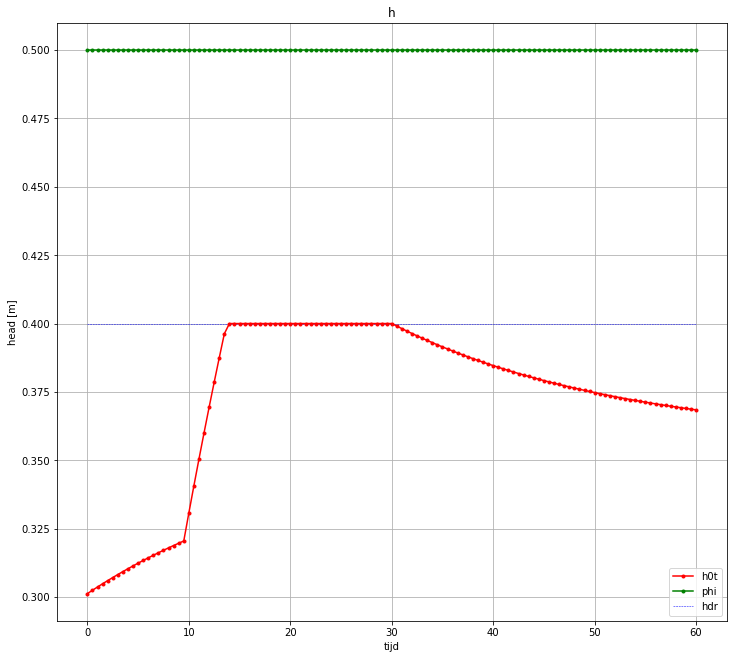

In [353]:
start_trace()

In [342]:
h0

9

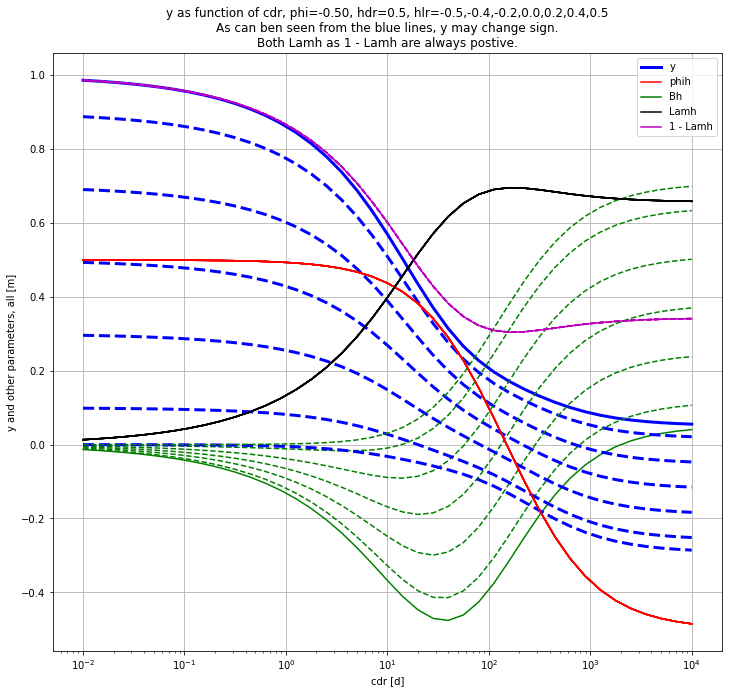

In [318]:
Cdr   = np.logspace(-2, 4, 41)
y     = np.zeros_like(Cdr)
phih_ = np.zeros_like(Cdr)
Bh_   = np.zeros_like(Cdr)
Lamh_ = np.zeros_like(Cdr)
N =  0.001
phi  = -0.5
hlr  = 0.0
hdr  = 0.5

Hlr = [-0.5, -0.4, -0.2, 0., 0.2, 0.4, 0.5]
hlrstr = ','.join([str(s) for s in Hlr])
title = ('y as function of cdr, phi={:.2f}, hdr={}, hlr={}'.format(phi, hdr, hlrstr) +
         '\n' + 'As can ben seen from the blue lines, y may change sign.' +
         '\n' + 'Both Lamh as 1 - Lamh are always postive.')
ax = newfig(title, 'cdr [d]', 'y and other parameters, all [m]', xscale='log')

for j, hlr in enumerate(Hlr):
    for i, cdr in enumerate(Cdr):
        w_, ch, Th, phih, lamh, Lamh, Bh = update_vars(
                N=N, phi=phi, hlr=hlr, hdr=hdr, cdr=cdr, **kwvars)
        y[    i] = ((phih - hlr) + Bh)
        phih_[i] = phih
        Bh_[  i] = Bh
        Lamh_[i] = Lamh
        #print('i {:3d} y {:8.3f} cdr {:8.1f}: phih {:8.4f}, hlr {:8.4f}, Bh {:8.3f}'.
        #      format(i, y[i], cdr, phih, hlr, Bh))
    if j==0:
        ax.plot(Cdr,     y, 'b', lw=3, label='y')
        ax.plot(Cdr, phih_, 'r', label='phih')
        ax.plot(Cdr,  Bh_ , 'g', label='Bh')
        ax.plot(Cdr, Lamh_, 'k', label='Lamh')
        ax.plot(Cdr, 1 - Lamh_, 'm', label='1 - Lamh')
    else:
        ax.plot(Cdr,     y, 'b--', lw=3, label='')
        ax.plot(Cdr, phih_, 'r', label='')
        ax.plot(Cdr,  Bh_ , 'g--', label='')
        ax.plot(Cdr, Lamh_, 'k', label='')
        ax.plot(Cdr, 1 - Lamh_, 'm--', label='')
        
ax.legend()

In [319]:
w_


2.0